### Problem Statement
## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

## <a id='1'>1. Multi-page web-scraping</a>
In this, I’m going to show you how to build a multi-page web-scraper in Python.

We will be scraping Amazon product reviews data, but the focus will be on looping through multiple pages.

If you’re looking for a basic introduction to web-scraping in Python, check out the single page Python web-scraper for Amazon product reviews data.

Scraped Amazon product reviews data for some Oneplus Flagship Smartphone
Introduction to using Splash and Docker for web-scraping
Step-by-step implementation of popular web-scraping Python libraries: BeautifulSoup, requests, and Splash.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

### <a id='1A'>A. Looping through multiple pages</a>
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

#### We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.

Add this to the bottom of the function above.

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\n9.5/10,The media could not be loaded.\n ...,16 September 2022
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nIt's a great phone to buy!,So it's been about a week that I am using this...,25 June 2022
3,5.0,5.0 out of 5 stars\nBest Smartphone in 25K,The media could not be loaded.\n ...,27 June 2022
4,5.0,5.0 out of 5 stars\nAmazing Phone,Best Operating system after iPhone so you and ...,26 February 2022
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nMobile is best,Need to upgrade the battery lifeMobile is best...,25 October 2022
96,4.0,4.0 out of 5 stars\nOverall good performance a...,I feel the quality of the phone is very good a...,13 March 2022
97,4.0,4.0 out of 5 stars\nSatisfactory and worth money,"During WhatsApp call, flip camera process take...",20 March 2022
98,4.0,4.0 out of 5 stars\nWorth every penny,Good phone. Decent battery backup. I switched ...,18 September 2022


In [8]:
from google.colab import files
uploaded=files.upload()

Saving Amazon_Reviews_Oneplus_Nord_CE2.csv to Amazon_Reviews_Oneplus_Nord_CE2.csv


In [9]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

## <a id='2'>2. Import Libraries</a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [11]:
# load the dataset
from google.colab import files
uploaded=files.upload()

Saving Amazon_Reviews_Oneplus_10R.csv to Amazon_Reviews_Oneplus_10R.csv


In [12]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\n9.5/10,The media could not be loaded.\n ...,16 September 2022
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nIt's a great phone to buy!,So it's been about a week that I am using this...,25 June 2022
3,5.0,5.0 out of 5 stars\nBest Smartphone in 25K,The media could not be loaded.\n ...,27 June 2022
4,5.0,5.0 out of 5 stars\nAmazing Phone,Best Operating system after iPhone so you and ...,26 February 2022
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nMobile is best,Need to upgrade the battery lifeMobile is best...,25 October 2022
96,4.0,4.0 out of 5 stars\nOverall good performance a...,I feel the quality of the phone is very good a...,13 March 2022
97,4.0,4.0 out of 5 stars\nSatisfactory and worth money,"During WhatsApp call, flip camera process take...",20 March 2022
98,4.0,4.0 out of 5 stars\nWorth every penny,Good phone. Decent battery backup. I switched ...,18 September 2022


## <a id='3'>3. Data Exploration</a>

In [13]:
reviews.Rating.describe()

count    100.000000
mean       4.000000
std        0.752101
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

#### Number of Words

In [14]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,The media could not be loaded.\n ...,271
1,The media could not be loaded.\n ...,559
2,So it's been about a week that I am using this...,146
3,The media could not be loaded.\n ...,155
4,Best Operating system after iPhone so you and ...,179


#### Number of characters

In [15]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,The media could not be loaded.\n ...,1453.0
1,The media could not be loaded.\n ...,2791.0
2,So it's been about a week that I am using this...,784.0
3,The media could not be loaded.\n ...,851.0
4,Best Operating system after iPhone so you and ...,1053.0


#### Average Word Length

In [16]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,The media could not be loaded.\n ...,4.601562
1,The media could not be loaded.\n ...,4.133581
2,So it's been about a week that I am using this...,4.376712
3,The media could not be loaded.\n ...,4.942857
4,Best Operating system after iPhone so you and ...,4.888268


#### Number of stopwords

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,The media could not be loaded.\n ...,99
1,The media could not be loaded.\n ...,214
2,So it's been about a week that I am using this...,57
3,The media could not be loaded.\n ...,33
4,Best Operating system after iPhone so you and ...,57


#### Number of special characters

In [18]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,The media could not be loaded.\n ...,0
1,The media could not be loaded.\n ...,0
2,So it's been about a week that I am using this...,0
3,The media could not be loaded.\n ...,0
4,Best Operating system after iPhone so you and ...,0


#### Number of numerics

In [19]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,The media could not be loaded.\n ...,4
1,The media could not be loaded.\n ...,20
2,So it's been about a week that I am using this...,2
3,The media could not be loaded.\n ...,3
4,Best Operating system after iPhone so you and ...,4


#### Number of Uppercase words

In [20]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,The media could not be loaded.\n ...,4
1,The media could not be loaded.\n ...,8
2,So it's been about a week that I am using this...,5
3,The media could not be loaded.\n ...,11
4,Best Operating system after iPhone so you and ...,6


In [21]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','hashtags','upper'],axis=1,inplace=True)

####  Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [22]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The media could not be loaded.\n              ...
1    The media could not be loaded.\n              ...
2    To it's been about a week that I am using this...
3    The media could not be loaded.\n              ...
4    West Operating system after shone so you and o...
Name: Review, dtype: object

#### As you can see spelling mistake did a mistake of correcting the word Hang into Sang in Context to this review the word 'Hang' fits here and not 'Sang'

## <a id='4'>4. Feature Engineering</a>

In [23]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     16
1     26
2     25
3     27
4     26
      ..
95    25
96    13
97    20
98    18
99    20
Name: Review_Date, Length: 100, dtype: object 
 0     September
1      February
2          June
3          June
4      February
        ...    
95      October
96        March
97        March
98    September
99         July
Name: Review_Date, Length: 100, dtype: object 
 0     2022
1     2022
2     2022
3     2022
4     2022
      ... 
95    2022
96    2022
97    2022
98    2022
99    2022
Name: Review_Date, Length: 100, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [24]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,16,September,2022
1,26,February,2022
2,25,June,2022
3,27,June,2022
4,26,February,2022
...,...,...,...
95,25,October,2022
96,13,March,2022
97,20,March,2022
98,18,September,2022


In [25]:
df.Month.value_counts()

Month
November     14
March        12
September    11
June         11
April        10
October       9
July          8
February      7
May           7
December      5
August        5
January       1
Name: count, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [26]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,September
1,2
2,6
3,6
4,2
...,...
95,October
96,3
97,3
98,September


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [28]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    int64  
 5   Month        100 non-null    object 
 6   Year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


### Dropping the Original Columns after splitting the data

In [29]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\n9.5/10,The media could not be loaded.\n ...,16,September,2022
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nIt's a great phone to buy!,So it's been about a week that I am using this...,25,6,2022
3,5.0,5.0 out of 5 stars\nBest Smartphone in 25K,The media could not be loaded.\n ...,27,6,2022
4,5.0,5.0 out of 5 stars\nAmazing Phone,Best Operating system after iPhone so you and ...,26,2,2022


In [30]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,5.0,5.0 out of 5 stars\n9.5/10,The media could not be loaded.\n ...,16 September 2022,16,September,2022
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,26,February,2022
2,5.0,5.0 out of 5 stars\nIt's a great phone to buy!,So it's been about a week that I am using this...,25 June 2022,25,June,2022
3,5.0,5.0 out of 5 stars\nBest Smartphone in 25K,The media could not be loaded.\n ...,27 June 2022,27,June,2022
4,5.0,5.0 out of 5 stars\nAmazing Phone,Best Operating system after iPhone so you and ...,26 February 2022,26,February,2022
...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nMobile is best,Need to upgrade the battery lifeMobile is best...,25 October 2022,25,October,2022
96,4.0,4.0 out of 5 stars\nOverall good performance a...,I feel the quality of the phone is very good a...,13 March 2022,13,March,2022
97,4.0,4.0 out of 5 stars\nSatisfactory and worth money,"During WhatsApp call, flip camera process take...",20 March 2022,20,March,2022
98,4.0,4.0 out of 5 stars\nWorth every penny,Good phone. Decent battery backup. I switched ...,18 September 2022,18,September,2022


## <a id='5'>5. Data Visualization</a>

#### date versus review count

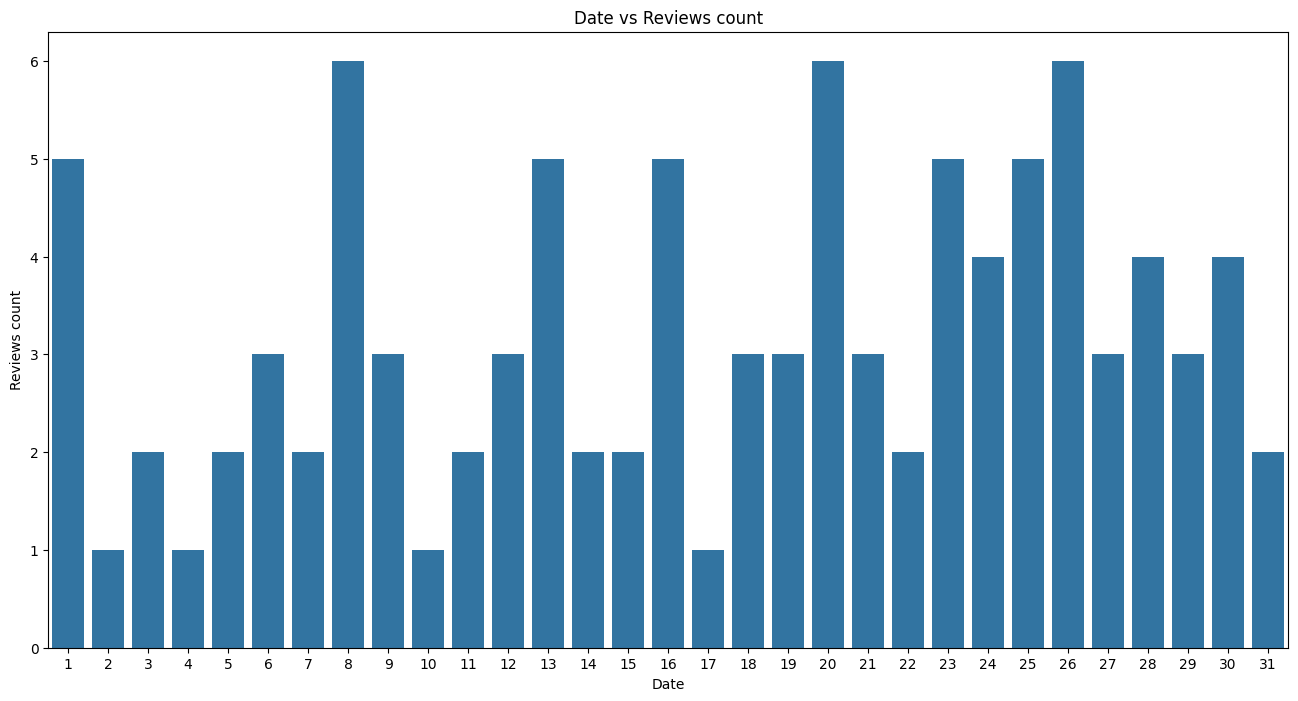

In [31]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

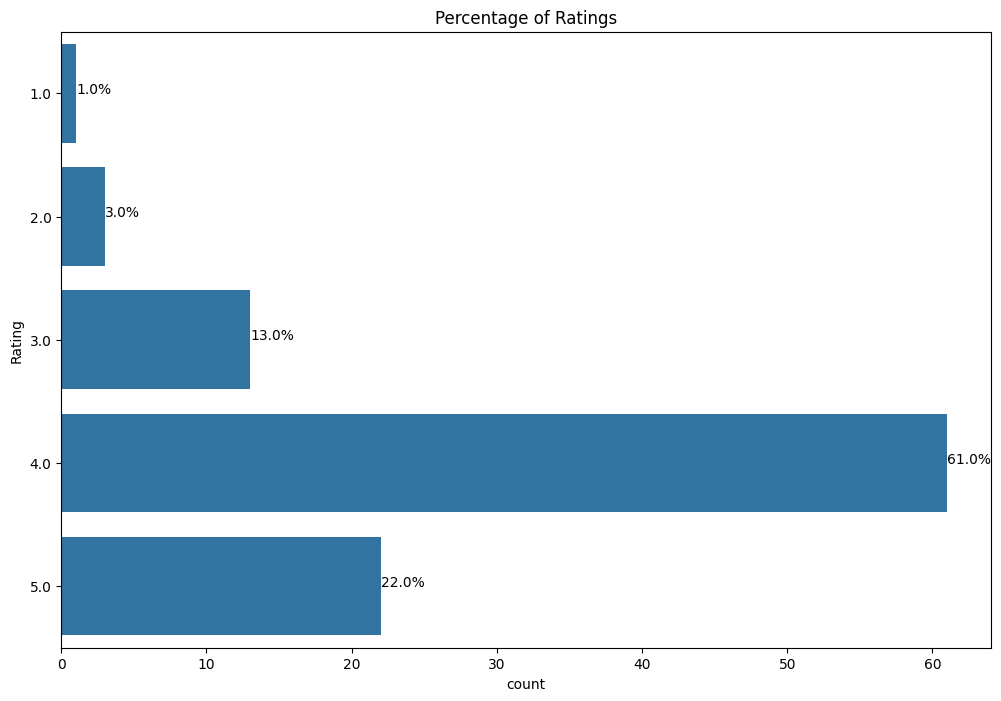

In [32]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

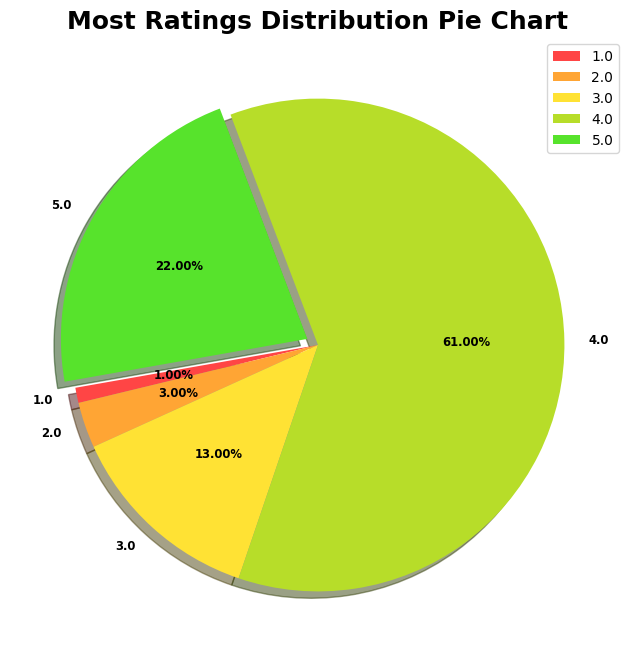

In [33]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##  <a id='6'>6. BasicText Preprocessing</a>
### <a id='6A'>A. For Sentiment Analysis</a>
##### keeping the DataFrame intact and each tweets separate from each other

In [34]:
data = df[['Review']]
data

,Review
0,The media could not be loaded.\n ...
1,The media could not be loaded.\n ...
2,So it's been about a week that I am using this...
3,The media could not be loaded.\n ...
4,Best Operating system after iPhone so you and ...
...,...
95,Need to upgrade the battery lifeMobile is best...
96,I feel the quality of the phone is very good a...
97,"During WhatsApp call, flip camera process take..."
98,Good phone. Decent battery backup. I switched ...


In [35]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [36]:
data

,Review
0,"the media could loaded. to give gist review, o..."
1,the media could loaded. build quality - rating...
2,so week i using phone i regret buying it. its ...
3,the media could loaded. pros:1) support triple...
4,best operating system iphone ur data safe. tho...
...,...
95,need upgrade battery lifemobile best nord ce 2...
96,i feel quality phone good expectations met. i ...
97,"during whatsapp call, flip camera process take..."
98,good phone. decent battery backup. i switched ...


In [37]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [38]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...


## <a id='7'>7. Text Pre-processing Techniques</a>
### <a id='7A'>A. Pre-processing 'Key Words'</a>
#### <a id='7Aa'>a. Removing '@names'</a>

In [39]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [40]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Ab'>b. Removing links (http | https)</a>

In [41]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Ac'>c. Removing Review with empty text</a>

In [42]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Ad'>d. Dropping duplicate rows</a>

In [43]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Ae'>e. Resetting index</a>
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [44]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Af'>f. Removing Punctuations, Numbers and Special characters</a>
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [45]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [46]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Ag'>g. Function to remove emoji</a>

In [47]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [48]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


In [49]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...,"[medium, could, loaded, give, gist, review, ov..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...,"[week, using, phone, regret, buying, hz, refre..."
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...,"[medium, could, loaded, pro, support, triple, ..."
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...,"[best, operating, system, iphone, ur, data, sa..."
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...,"[writing, one, complete, month, usgae, phone, ..."
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...,"[purchased, oneplus, nord, ce, g, july, comple..."
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...,"[writing, review, day, usagedesign, phone, des..."
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...,"[overall, best, performance, using, since, las..."
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...,"[writing, review, using, mobile, one, year, us..."


In [50]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#### <a id='7Ah'>h. Removing Stop words</a>
With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [51]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop.txt


In [52]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [53]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [54]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...
5,writing one complete month usgae phone phone g...,I am writing this after one complete month of ...
6,purchased oneplus nord ce g july completing ye...,I had purchased the OnePlus Nord CE 2 5g on Ju...
7,writing review day usagedesign phone design go...,Writing the reviews after 3 days of UsageDesig...
8,overall best performance using since last year,Overall best performance.Using since last 2 ye...
9,writing review using mobile one year used redm...,I am writing this review after using this mobi...


#### <a id='7Ai'>i. Tokenize *'Clean_Reviews'*</a>  

In [55]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [56]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [medium, could, loaded, give, gist, review, ov...
1    [medium, could, loaded, build, quality, rating...
2    [week, using, phone, regret, buying, hz, refre...
3    [medium, could, loaded, pro, support, triple, ...
4    [best, operating, system, iphone, ur, data, sa...
5    [writing, one, complete, month, usgae, phone, ...
6    [purchased, oneplus, nord, ce, g, july, comple...
7    [writing, review, day, usagedesign, phone, des...
8    [overall, best, performance, using, since, las...
9    [writing, review, using, mobile, one, year, us...
Name: Clean_Reviews, dtype: object

#### <a id='7Ai'>j. Converting words to Stemmer</a>

In [57]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [58]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,medium could load give gist review overal phon...
1,medium could load build qualiti rate one light...
2,week use phone regret buy hz refresh rate smoo...
3,medium could load pro support tripl card slot ...
4,best oper system iphon ur data safe bank trans...
...,...
95,need upgrad batteri lifemobil best nord ce sma...
96,feel qualiti phone good expect met gamer requi...
97,whatsapp call flip camera process take unusu t...
98,good phone decent batteri backup switch iphon ...


#### <a id='7Ak'>k. Converting words to Lemma</a>

In [59]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,medium could loaded give gist review overall p...
1,medium could loaded build quality rating one l...
2,week using phone regret buying hz refresh rate...
3,medium could loaded pro support triple card sl...
4,best operating system iphone ur data safe bank...
...,...
95,need upgrade battery lifemobile best nord ce s...
96,feel quality phone good expectation met gamer ...
97,whatsapp call flip camera process take unusual...
98,good phone decent battery backup switched ipho...


## <a id='8'>8. Basic Feature Extaction</a>
### <a id='8Aa'>A. **Applying bag of Words without N grams**</a>

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [61]:
#print(cv.vocabulary_)

In [62]:
print(tweetscv.toarray()[100:200])

[]


### <a id='8Ba'>B. **CountVectorizer with N-grams (Bigrams & Trigrams)**</a>

In [63]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/100 [00:00<?, ?it/s]

In [64]:
corpus[3]

'medium could load pro support tripl card slot sim one memori card support dual sim g hz fluid amol display support hdr indispli fingerprint scanner fast camera qualiti best support ei hdr support carrier aggreg upto band lte network perform good smooth ui without lag bodi design good gray mirror colour awesom support wifi w fast charg gorilla glass con mp macro len could better camera support ei oi camera qualiti stabil good support stereo speaker sound loud batteri capac mah good batteri backup though android box oxygen perform well could hz display hz display also smooth'

In [65]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [66]:
X.shape

(100, 5000)

In [67]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### <a id='8Ca'>C. **TF-IDF Vectorizer**</a>

In [68]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/100 [00:00<?, ?it/s]

In [69]:
corpus[4]

'best oper system iphon ur data safe bank transact mobil understand need plu year secur updat realli great thing camera good enough sharp zoom realli good see attach photo taken th floor amol display amaz differ notic watch movi netflix super dt howev phone sound quit loud take call loudspeak without issu complaint speed play game howev tri disappoint heat issu heat littl bit charg obviou w believ charg mobil minut ye warranti seem like compani preeti sure brake conclus cost get best happi rest import howev phone well area best luck chines compani till time india develop effect mobil keep earn catch soon'

In [70]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [71]:
X.shape

(100, 5000)

In [72]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

### <a id='8Da'>D. Named Entity Recognition (NER)</a>

In [73]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'medium could loaded give gist review overall phone talk specific detailed review shall give complete detailed aspect phone displaythe display quite vibrant brightness great even sunlight watching movie netflix would fun refresh rate hz work charm overall find issue processor ramus played quite decent game run parallel apps single time find lag processor batteryyour phone charge min w charge practically blessing screen time around hour battery last hour easily camerai use much camera quite okayish say excellent work front camera quite good design bodythere little chin bottom phone affect much could improved back silver metallic finish bother lot shine like mirror also small dot backpanel surface overtime cover used minimise effect reason reduced rating back panel cellphone operating systemloved operating system pretty smooth aesthetically pleasant charm eye overall phone gem always go medium could loaded build quality rating one light weight phone say quite comfortable one hand usage e

In [74]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [75]:
for token in doc_block[:50]:
    print(token,token.pos_)

medium NOUN
could AUX
loaded VERB
give VERB
gist NOUN
review NOUN
overall ADJ
phone NOUN
talk NOUN
specific ADJ
detailed ADJ
review NOUN
shall AUX
give VERB
complete ADJ
detailed ADJ
aspect NOUN
phone NOUN
displaythe NOUN
display NOUN
quite ADV
vibrant ADJ
brightness NOUN
great ADJ
even ADV
sunlight NOUN
watching VERB
movie NOUN
netflix NOUN
would AUX
fun VERB
refresh ADJ
rate NOUN
hz PROPN
work NOUN
charm NOUN
overall ADV
find VERB
issue NOUN
processor NOUN
ramus NOUN
played VERB
quite ADV
decent ADJ
game NOUN
run VERB
parallel ADJ
apps NOUN
single ADJ
time NOUN


In [76]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['cover', 'term', 'styling', 'oppo', 'phone', 'liked', 'recommend', 'attache', 'going', 'use', 'cover', 'matterdisplay', 'rating', 'plan', 'rate', 'work', 'wish', 'hz', 'bottom', 'chin', 'thing', 'gorilla', 'glass', 'protection', 'applied', 'panel', 'wellperformance', 'rating', 'dimensity', 'get', 'job', 'done', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'expect', 'fps', 'cod', 'say', 'processor', 'competition', 'offering', 'decide', 'gaming', 'matter', 'year', 'based', 'oxygen', 'say', 'color', 'oos', 'bug', 'say', 'lot', 'wait', 'ideacamera', 'rating', 'mp', 'atleast', 'expecting', 'sensor', 'provided', 'omnivison', 'sensor', 'get', 'job', 'done', 'camera', 'check', 'review', 'video', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi']


In [77]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,191
1,camera,102
2,battery,71
3,quality,41
4,issue,37
5,charging,37
6,day,33
7,performance,32
8,display,30
9,time,29


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

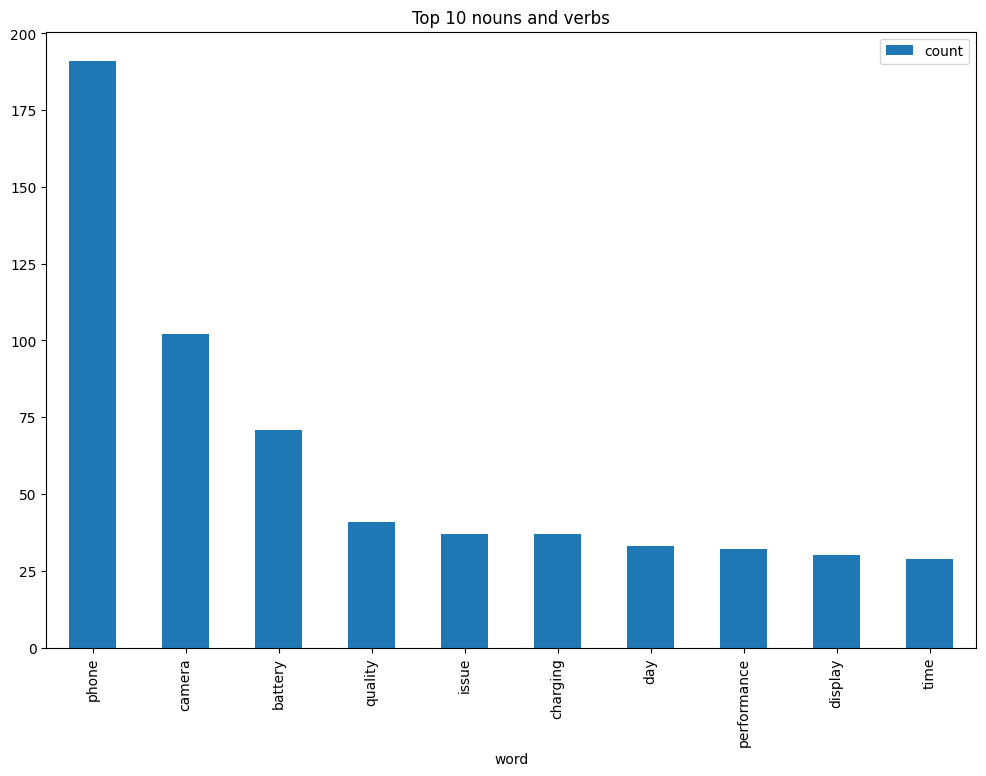

In [78]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## <a id='9'>9. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.


### <a id='9Aa'>A. Feature Extraction for 'Key Words'</a>

In [79]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## <a id='10'>10. Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [80]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### <a id='10Aa'>a. Using NLTK's SentimentIntensityAnalyzer</a>

In [81]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,count
Clean_Reviews,
pos,91
neg,9


In [82]:
dataframe.Clean_Reviews[8]

'overall best performance using since last year'

In [83]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

In [84]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,medium could loaded give gist review overall p...,"{'neg': 0.029, 'neu': 0.688, 'pos': 0.283, 'co..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,week using phone regret buying hz refresh rate...,"{'neg': 0.101, 'neu': 0.599, 'pos': 0.3, 'comp..."
3,medium could loaded pro support triple card sl...,"{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp..."
4,best operating system iphone ur data safe bank...,"{'neg': 0.018, 'neu': 0.562, 'pos': 0.42, 'com..."


In [85]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,medium could loaded give gist review overall p...,"{'neg': 0.029, 'neu': 0.688, 'pos': 0.283, 'co...",0.9913
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977
2,week using phone regret buying hz refresh rate...,"{'neg': 0.101, 'neu': 0.599, 'pos': 0.3, 'comp...",0.9635
3,medium could loaded pro support triple card sl...,"{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...",0.9925
4,best operating system iphone ur data safe bank...,"{'neg': 0.018, 'neu': 0.562, 'pos': 0.42, 'com...",0.9952


In [86]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,medium could loaded give gist review overall p...,"{'neg': 0.029, 'neu': 0.688, 'pos': 0.283, 'co...",0.9913,Positive
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977,Positive
2,week using phone regret buying hz refresh rate...,"{'neg': 0.101, 'neu': 0.599, 'pos': 0.3, 'comp...",0.9635,Positive
3,medium could loaded pro support triple card sl...,"{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...",0.9925,Positive
4,best operating system iphone ur data safe bank...,"{'neg': 0.018, 'neu': 0.562, 'pos': 0.42, 'com...",0.9952,Positive
...,...,...,...,...
95,need upgrade battery lifemobile best nord ce s...,"{'neg': 0.156, 'neu': 0.611, 'pos': 0.233, 'co...",0.3400,Positive
96,feel quality phone good expectation met gamer ...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.8591,Positive
97,whatsapp call flip camera process take unusual...,"{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...",0.8074,Positive
98,good phone decent battery backup switched ipho...,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'comp...",0.8020,Positive


In [87]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Axes: xlabel='sentiment', ylabel='count'>

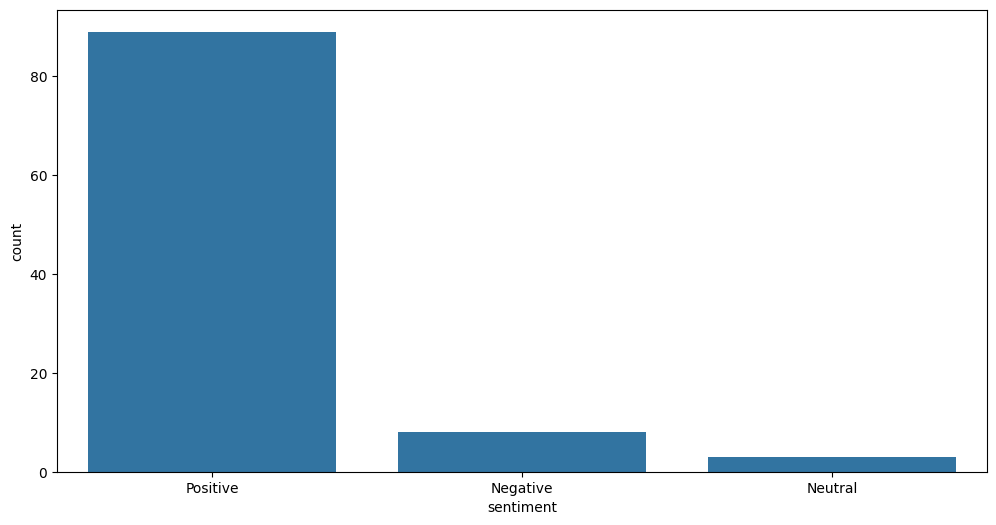

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-89-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

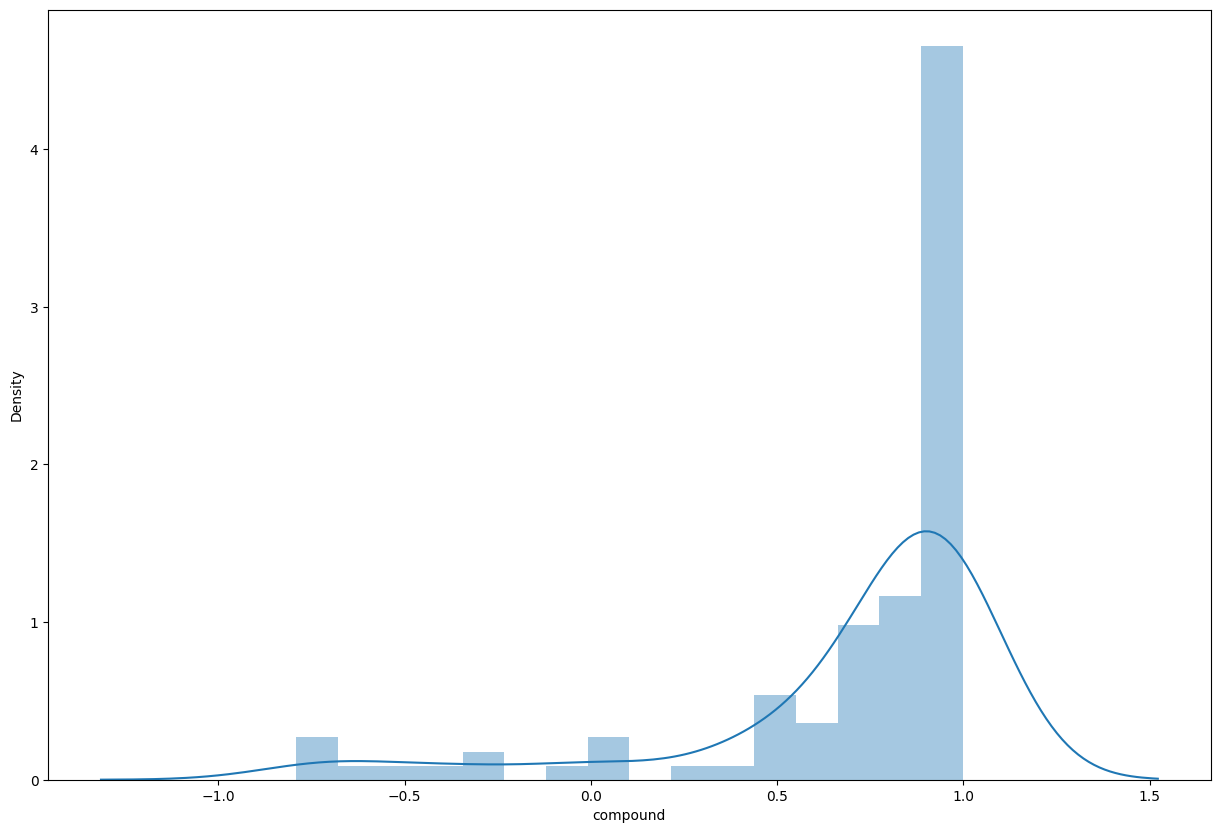

In [89]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

### <a id='10Ab'>b. Using TextBlob</a>

In [90]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,96
neg,4


In [91]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,medium could loaded give gist review overall p...,The media could not be loaded.\n ...,0.402072,0.197817
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783
2,week using phone regret buying hz refresh rate...,So it's been about a week that I am using this...,0.577083,0.296875
3,medium could loaded pro support triple card sl...,The media could not be loaded.\n ...,0.550000,0.500000
4,best operating system iphone ur data safe bank...,Best Operating system after iPhone so you and ...,0.575253,0.382765


Text(0, 0.5, 'Subjectivity')

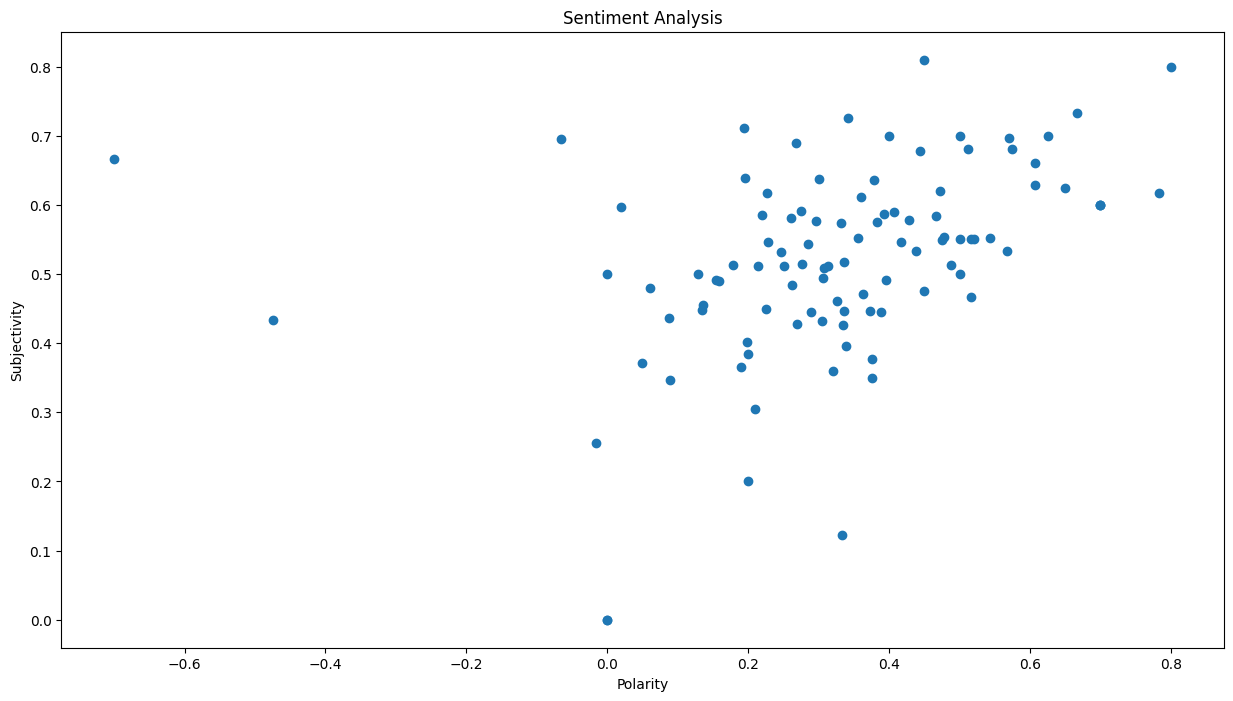

In [92]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [93]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

##### *NLTK* gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

## <a id='11'>11. Story Generation and Visualization</a>

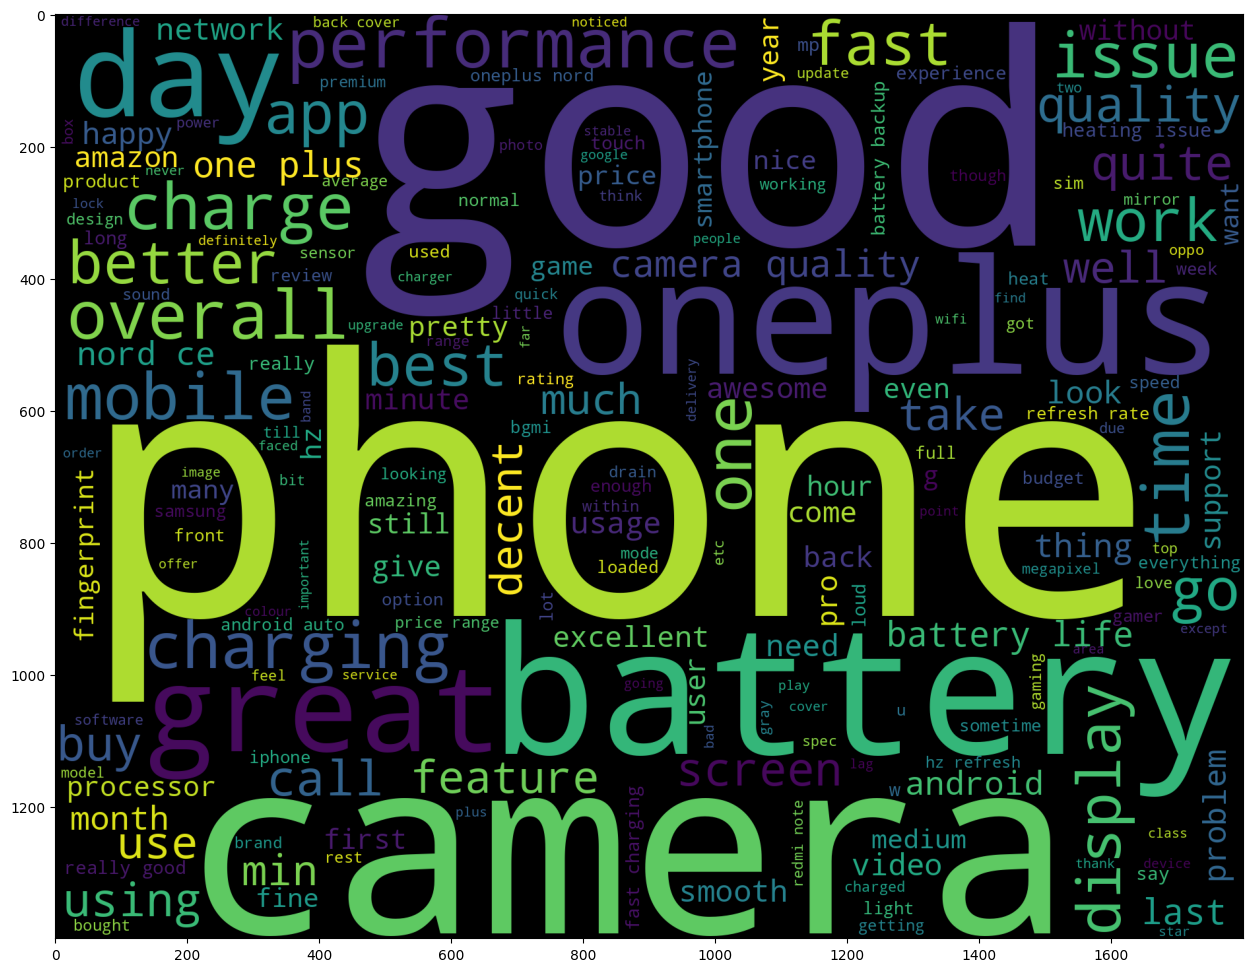

In [94]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)